# Создан пример использования PyTorch c базовым перцептроном

Примеры категорий, которые может определять ResNet-18:
Животные:

Домашние животные: кошка, собака, золотистый ретривер, сиамская кошка.
Дикие животные: лев, тигр, медведь, зебра, слон.
Птицы: пингвин, павлин, орел, утка, попугай.
Насекомые: бабочка, муравей, стрекоза.
Транспортные средства:

Легковые автомобили: седан, спортивная машина, внедорожник.
Мотоциклы: скутер, спортивный байк.
Авиация: самолет, вертолет.
Морской транспорт: лодка, парусник.
Объекты и еда:

Еда: яблоко, апельсин, банан, пицца, бургер.
Обычные объекты: ноутбук, телефон, стол, лампа, будильник.
Природа:

Пейзажи: горы, пляж, лес.
Растения: пальма, ель, подсолнух.
Одежда:

Шляпа, футболка, куртка, джинсы, платье.
Спортивные предметы:

Футбольный мяч, теннисная ракетка, бейсбольная перчатка.

#  Шаг 1
 Во-первых, мы импортируем библиотеку PyTorch в наш проект с помощью следующего фрагмента кода + необходимые библиотеки

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator

# Шаг 2
Далее нужно подготовить и загрузить набор данных в проект;  
Загрузка предобученной модели ResNet-18;  
Перевод модели в режим предсказания (инференс);  


In [14]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Шаг 3
Теперь мы переходим к созданию функций:  
 Функция для предобработки изображения  
 Функция для предсказания класса  
Сопоставление индексов классов с названиями (загрузка из ImageNet)  
Функция перевода текста с английского на русский  

In [15]:

def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменение размера изображения
        transforms.ToTensor(),         # Преобразование в тензор
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
    ])
    img_tensor = transform(img).unsqueeze(0)  # Добавляем размер батча
    return img, img_tensor


def predict(image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)  # Прямой проход модели
        _, predicted_idx = torch.max(outputs, 1)  # Индекс с максимальным значением
        return predicted_idx.item()


def load_class_names():
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    import requests
    response = requests.get(url)
    return response.text.strip().split("\n")

def translate_to_russian(text):
    translator = Translator()
    translation = translator.translate(text, src='en', dest='ru')
    return translation.text



# Шаг 4 
загрузка и обработка изображения  
Перевод на русский  
Вывод картинки и что оно обозначает

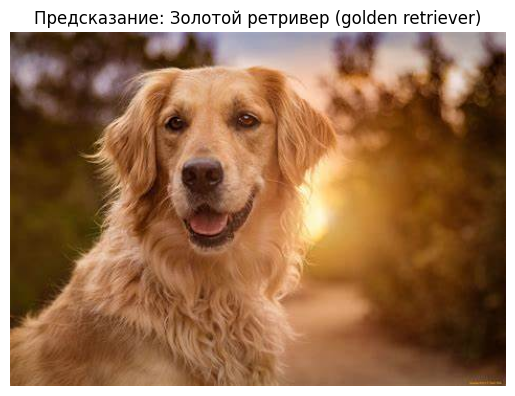

In [16]:
image_path = "C:\\Users\\Николай\\Desktop\\ДПО\\II matchine\\sample_image.jpg"  # Укажите путь к изображению


try:
    original_image, image_tensor = preprocess_image(image_path)
    # Предсказание
    class_names = load_class_names()
    predicted_idx = predict(image_tensor)
    predicted_class_en = class_names[predicted_idx]

    predicted_class_ru = translate_to_russian(predicted_class_en)

    # Вывод результата
    plt.imshow(original_image)
    plt.title(f"Предсказание: {predicted_class_ru} ({predicted_class_en})")
    plt.axis("off")
    plt.show()
except FileNotFoundError:
    print(f"Файл {image_path} не найден. Убедитесь, что путь указан правильно.")